# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
# %pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-01-07 12:13:29.890405: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 12:13:29.912936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736248409.933695   52965 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736248409.939638   52965 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 12:13:29.960625: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import numpy as np
import pandas as pd

In [4]:
from FrameLoader import FrameLoader
from DataRepository import DataRepository
from helpers import plot

In [5]:
repo = DataRepository()
repo.load_relativePaths_of_videos_with_framelabels()
repo.VideoNames.head()
# repo.VideoNames.iloc[0]["name"]

connection established


folderId  id                                               name
id                                                                 
2          3   2  competition/belgium/DD3/bk-handles-dd3-2024-ju...
5          3   5  competition/belgium/DD3/bk-handles-dd3-2024-se...
8          3   8  competition/belgium/DD3/bk-hipeskip-dd3-2024-j...
11         3  11  competition/belgium/DD3/bk-jollyjumpers-dd3-20...
14         3  14  competition/belgium/DD3/bk-jumpup-dd3-2024-bel...

In [6]:
frameloader = FrameLoader(repo)

In [7]:
f, _ = frameloader.get_frame(103, 66, dim=512, original_x=0.5, original_y=0.5, original_width=0.5, original_height=0.5)
f

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

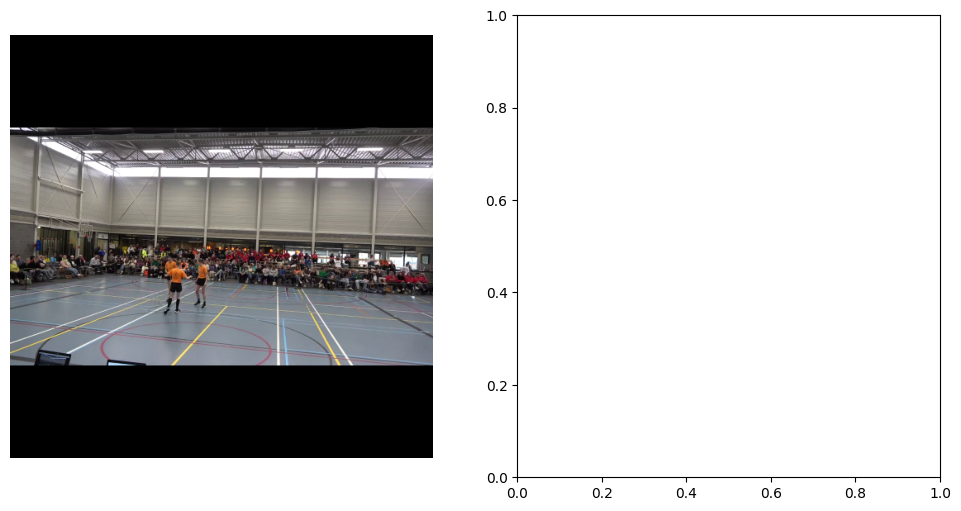

In [8]:
plot([f])

In [9]:
repo.VideoNames.head()

folderId  id                                               name
id                                                                 
2          3   2  competition/belgium/DD3/bk-handles-dd3-2024-ju...
5          3   5  competition/belgium/DD3/bk-handles-dd3-2024-se...
8          3   8  competition/belgium/DD3/bk-hipeskip-dd3-2024-j...
11         3  11  competition/belgium/DD3/bk-jollyjumpers-dd3-20...
14         3  14  competition/belgium/DD3/bk-jumpup-dd3-2024-bel...

In [10]:
repo.VideoNames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 2 to 872
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   folderId  40 non-null     int64 
 1   id        40 non-null     int64 
 2   name      40 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.3+ KB


In [11]:
repo.VideoNames.loc[101]["name"]

'competition/belgium/DD3/bk-sipiro-dd3-2024-junioren-lore-j1.MP4'

In [12]:
from DataGeneratorFrames import DataGeneratorFrames

connection established
DataGeneratorSkillBorders init done
on_epoch_end_called
lengte is =  4
1521.0
1795.0
304.0
1137.0
102.0
1222.0
100.0
838.0


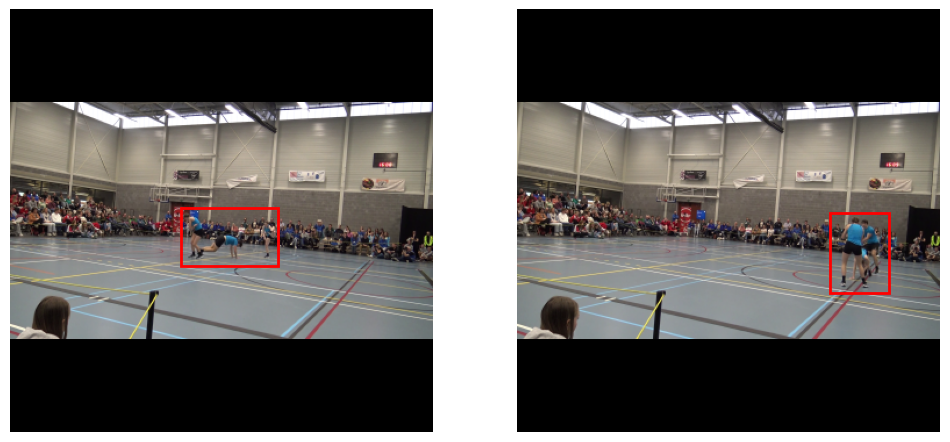

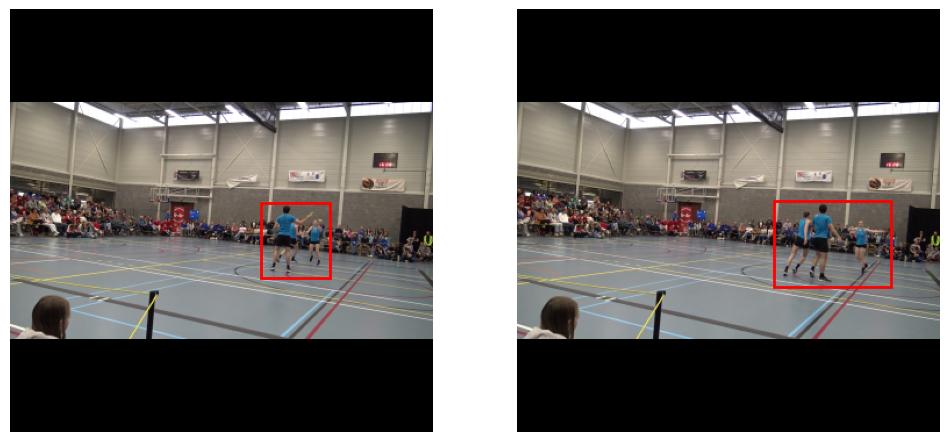

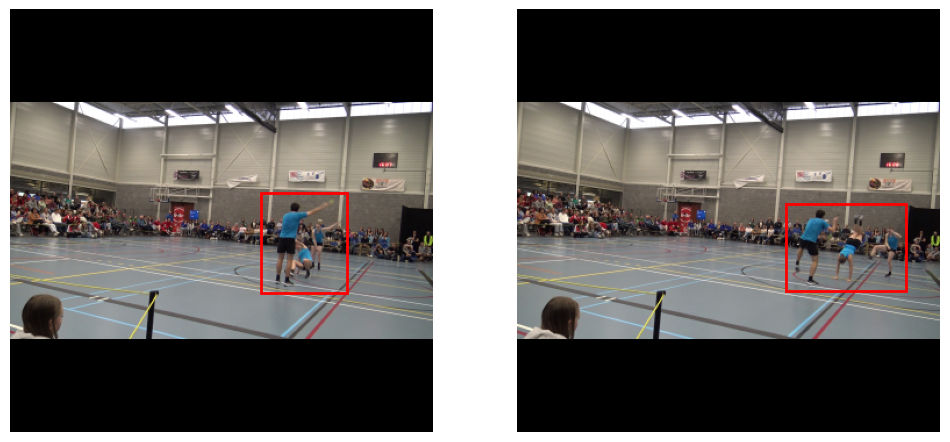

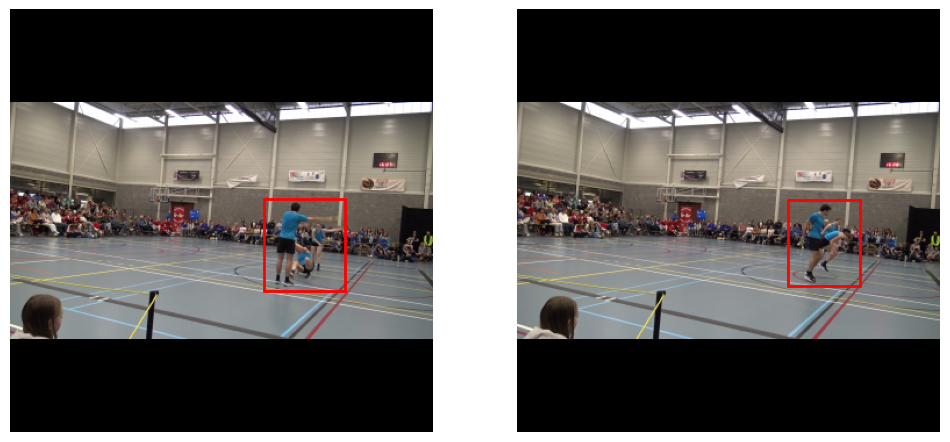

230.0
81.0
1822.0
482.0
1438.0
579.0
1654.0
31.0


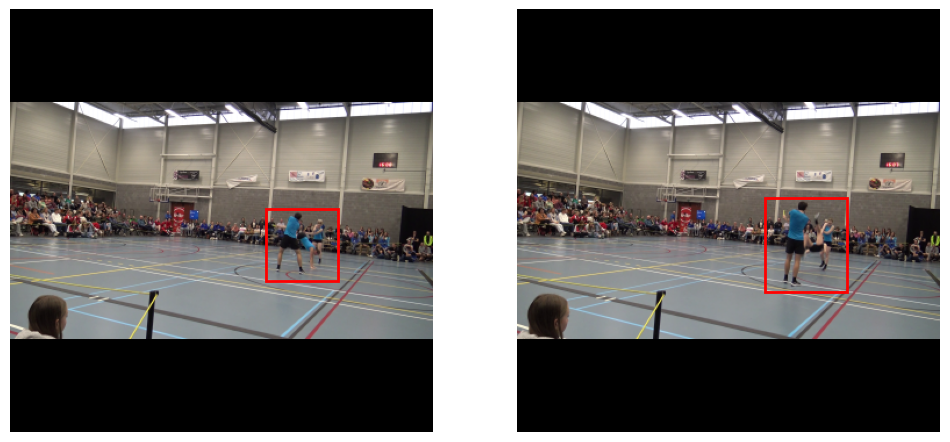

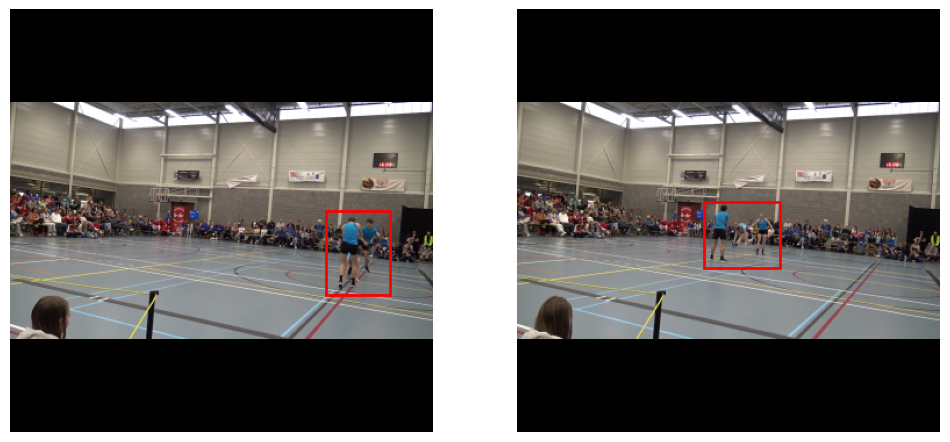

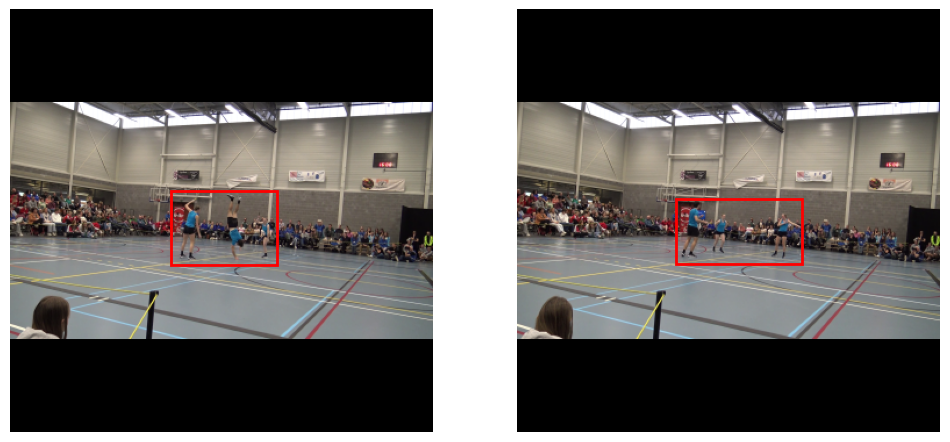

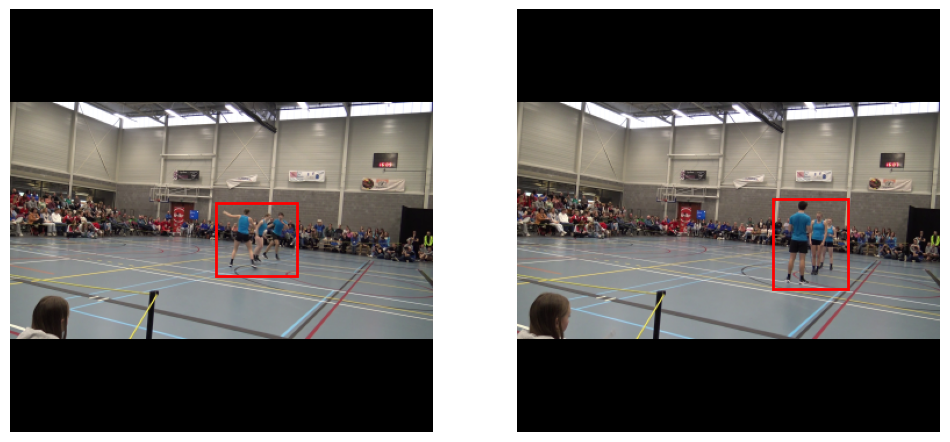

791.0
1139.0
480.0
1136.0
1865.0
88.0
1074.0
1540.0


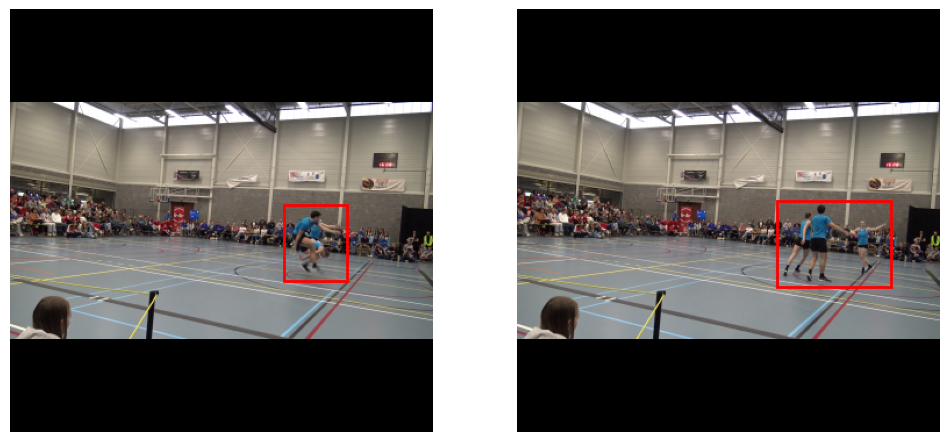

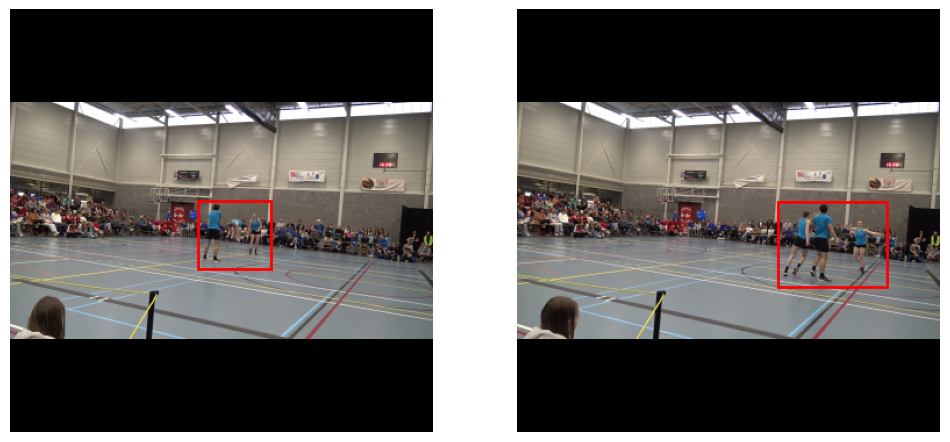

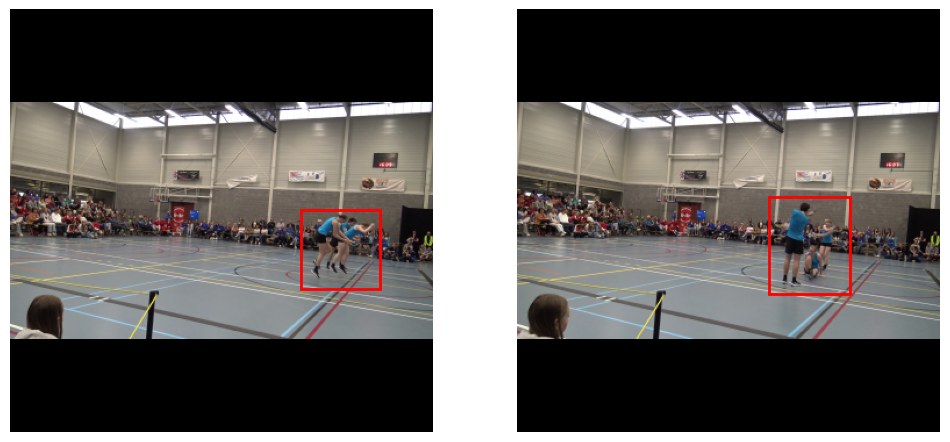

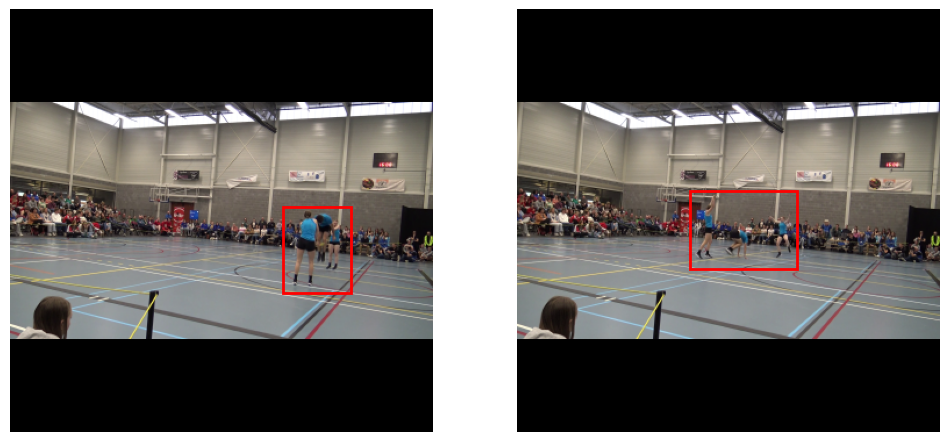

484.0
1861.0
231.0
1183.0
701.0
1279.0


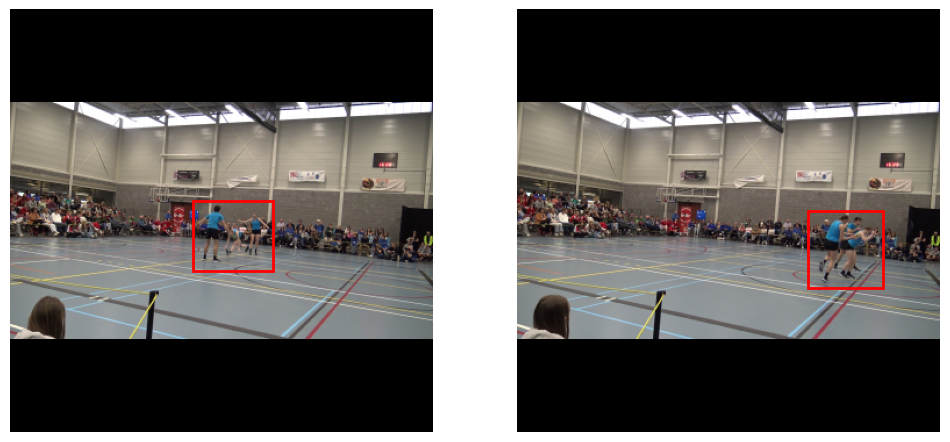

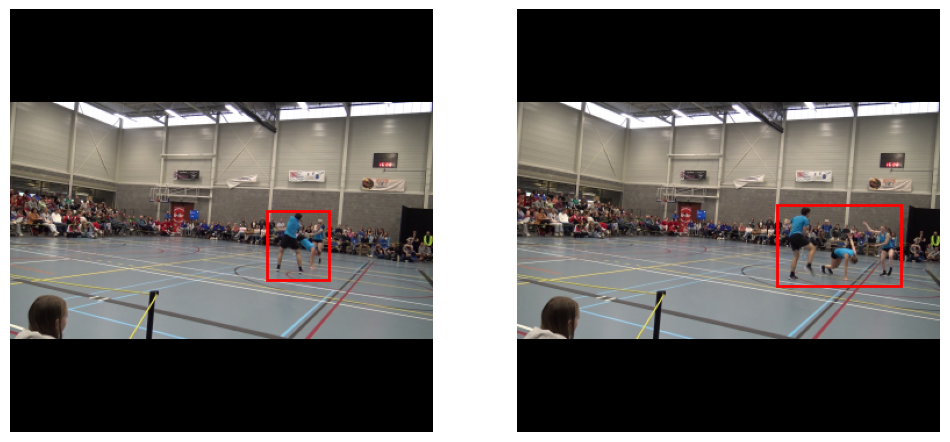

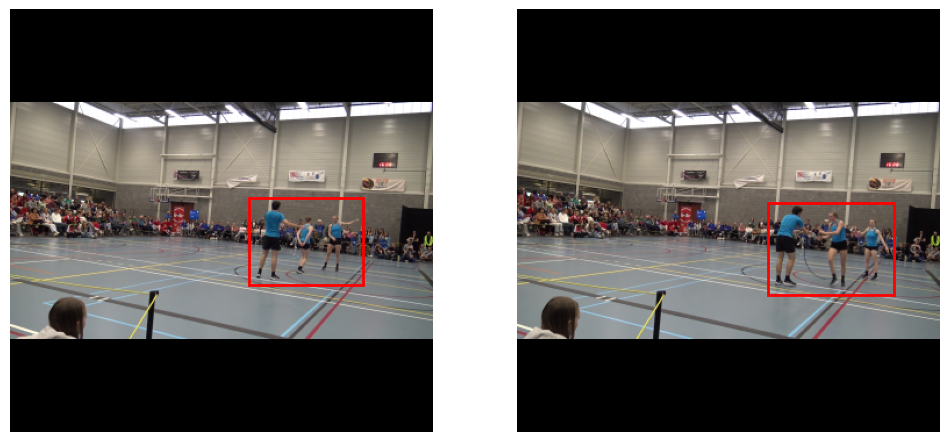

CPU times: user 1min 52s, sys: 2.77 s, total: 1min 54s
Wall time: 29.6 s


In [13]:
%%time

train_gen = DataGeneratorFrames(
    frameloader=frameloader,
    train_test_val="train",
    dim=(364,364),
    batch_size=8
)

print("lengte is = ", train_gen.__len__())
for i in range(train_gen.__len__()):
    X, y = train_gen.__getitem__(i, normalize=False)
    for j in range(len(X)//2):
        plot(X[j*2:j*2+2], y[j*2:j*2+2])
